<a href="https://colab.research.google.com/github/meichenfang/Poisson-regression/blob/main/demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+4"><center> Demonstrations </center></font> 

color by time correlation

# Load packages

In [1]:
%cd ../RADOM

# restrict numpy to use only one core, otherwise it will use all cores when doing 
import os
os.environ["BLAS_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" # 


from inference import Trajectory
from plotting import *
from models.two_species_tau import get_Y

/home/mffang/workspace/Poisson-regression/RADOM


In [2]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
import copy
from sklearn.decomposition import PCA

In [3]:
plt.rcParams['font.size'] = '24'
label_font = '36'

loga_max = 4
logb_mu = 1
logb_sd = 1
tau_max = 0.25
beta = 10 #p//10
lambda_tau = 0.1

%cd ../simulation_results

/home/mffang/workspace/Poisson-regression/simulation_results


# A linear trajectory

In [46]:
#%% generate data
random_seed = 2023
n=1000
p=100
topo = np.array([[0,1,2]])
tau = (0,1,2)

np.random.seed(random_seed)
L=len(topo)
n_states=len(set(topo.flatten()))
t=np.linspace(tau[0],tau[-1],n)
true_t = []

theta=np.zeros((p,n_states+2))
for j in range(n_states):
    theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
theta[:,-2:]=np.exp(np.random.normal(logb_mu,logb_sd,size=(p,2)))

Y = np.zeros((n*L,p,2))
for l in range(L):
    theta_l = np.concatenate((theta[:,topo[l]], theta[:,-2:]), axis=1)
    Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
    true_t = np.append(true_t,t)

X = np.random.poisson(Y)

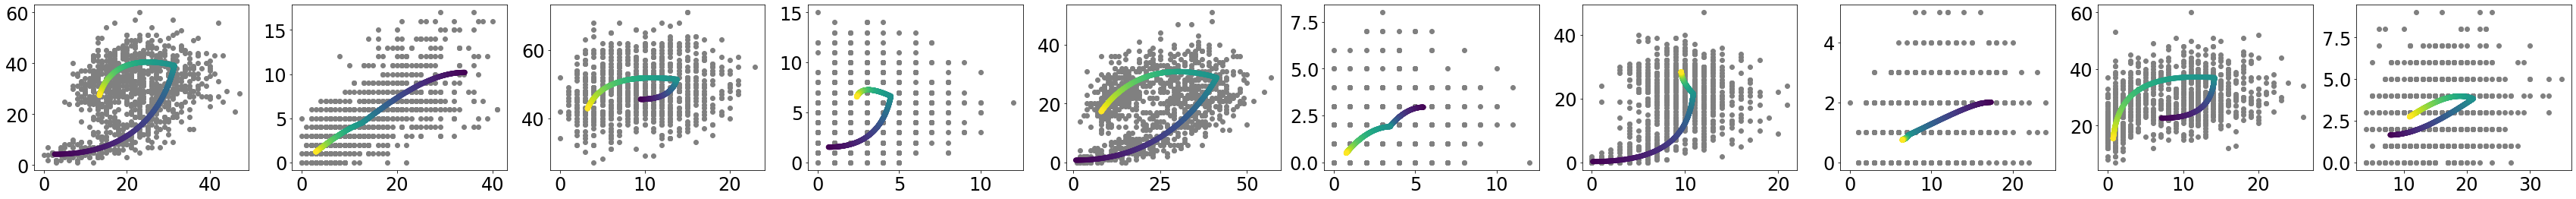

In [47]:
t = np.linspace(tau[0],tau[-1],n)
p = 10
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(p):
    #ax[i].plot(Y[:,i,1]*gamma[i],Y[:,i,1],'--', color='gray');
    ax[i].scatter(X[:,i,0],X[:,i,1],c='gray');
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c=true_t);
# time increases from blue to red

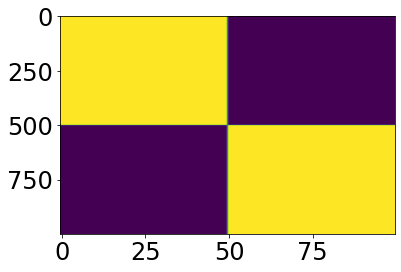

In [48]:
m=100
Q0 = np.zeros((len(X),1,m))

idx = (true_t < 1)
Q0[idx,:,:int(m/2)] += 1

idx = (true_t >= 1)
Q0[idx,:,int(m/2):] += 1

Q0=Q0/Q0.sum(axis=(1,2),keepdims=True)

plt.imshow(Q0[:,0],aspect='auto');

In [69]:
traj = Trajectory(topo, tau, model="two_species_ss_tau", verbose=1)
traj = traj.fit(X,Q=Q0,params={"lambda_tau":1},beta=beta,epoch=100,parallel=True,n_threads=4)

run method fit_warm_start


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]


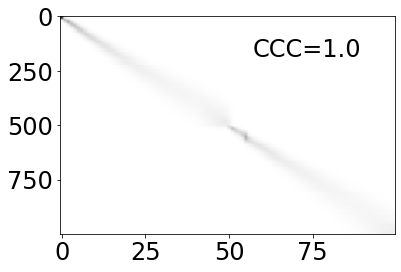

In [70]:
plot_t(traj,t=true_t);

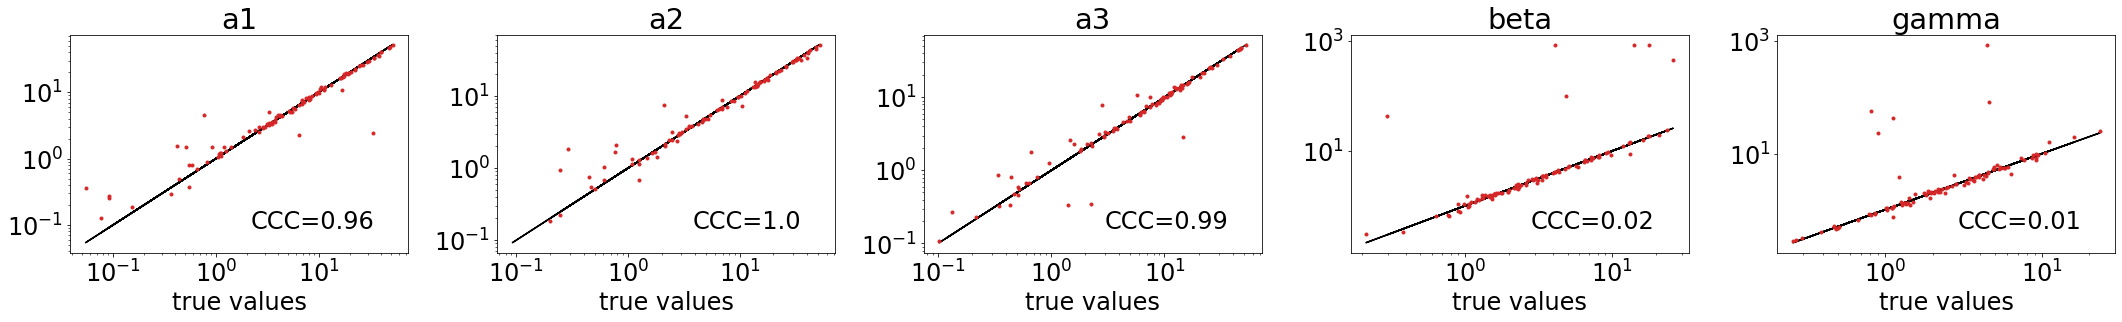

In [71]:
plot_theta(theta[:100], traj.theta[:100,[0,1,2,-2,-1]], dot_color='tab:red');

In [ ]:
traj = Trajectory(topo, tau, model="two_species_tau", verbose=1)
traj = traj.fit(X,m=100,n_init=10,beta=beta,perm_theta=False,epoch=10,parallel=True,n_threads=4)

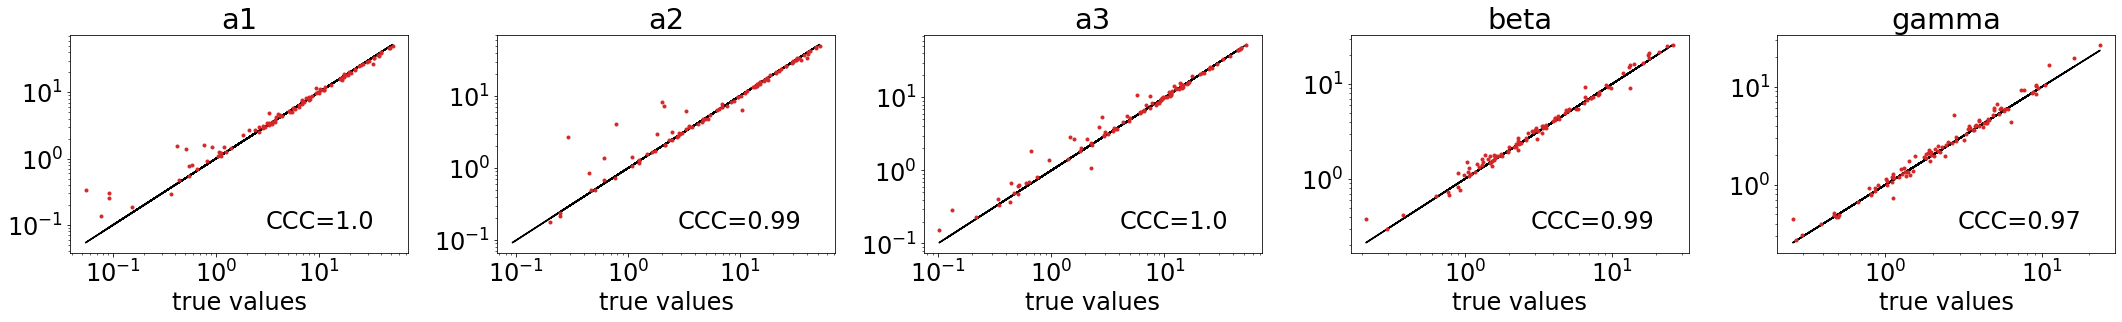

In [53]:
plot_theta(theta[:100], traj.theta[:100], dot_color='tab:red');

<AxesSubplot:>

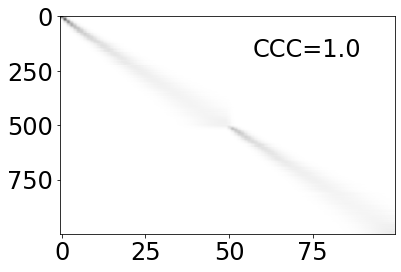

In [54]:
plot_t(traj,l=0,t=true_t)

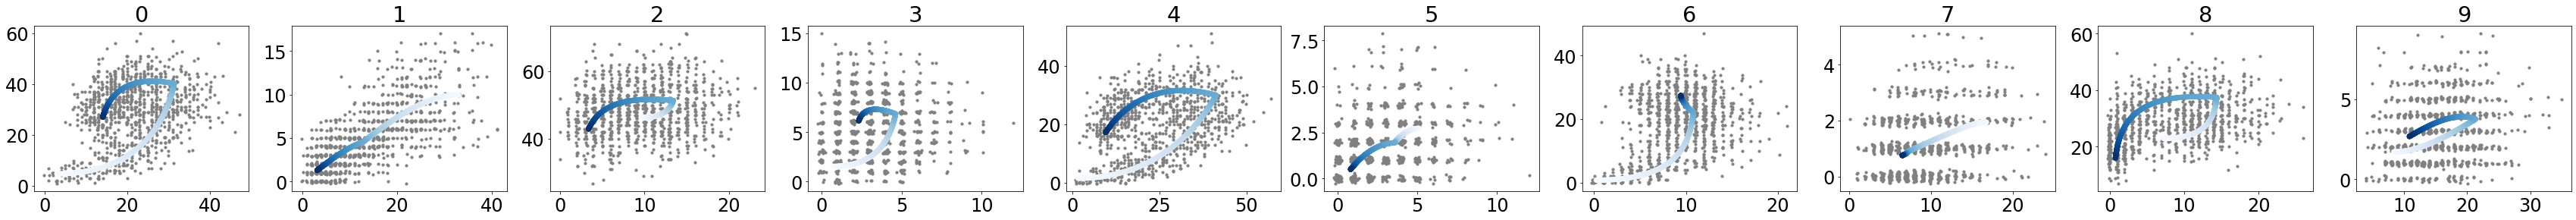

In [55]:
plot_phase(traj,idx=np.arange(10));

# Add a bifurcation

In [13]:
#%% generate data
random_seed = 2023
n=1000
p=10
topo = np.array([[0,1],[0,2]])
tau = (0,1)

np.random.seed(random_seed)
L=len(topo)
n_states=len(set(topo.flatten()))
t=np.linspace(tau[0],tau[-1],n)
true_t = []

theta=np.zeros((p,n_states+3))
for j in range(n_states+1):
    theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
theta[:,-2:]=np.exp(np.random.uniform(0,logb_max,size=(p,2)))

Y = np.zeros((n*L,p,2))
for l in range(L):
    theta_l = np.concatenate((theta[:,topo[l]], theta[:,-3:]), axis=1)
    Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
    true_t = np.append(true_t,t)

X = np.random.poisson(Y)

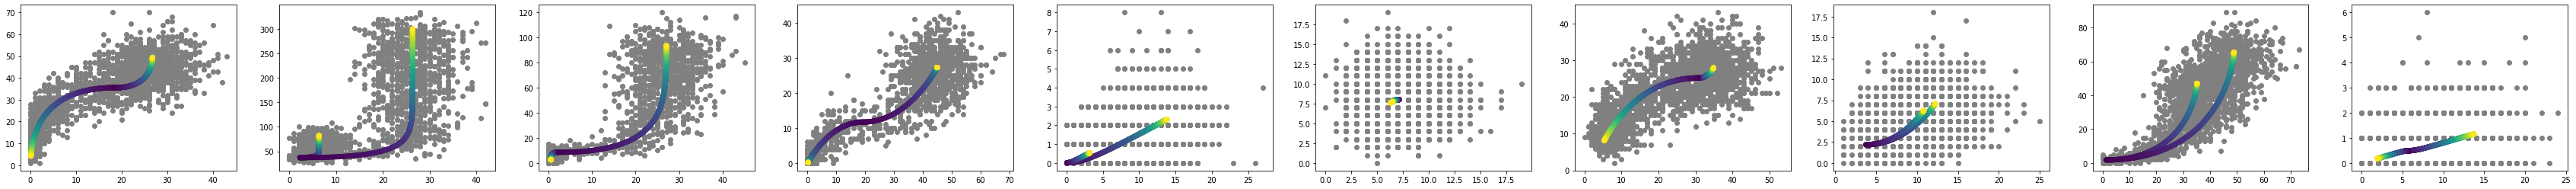

In [14]:
t = np.linspace(tau[0],tau[-1],n)
p = 10
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(p):
    #ax[i].plot(Y[:,i,1]*gamma[i],Y[:,i,1],'--', color='gray');
    ax[i].scatter(X[:,i,0],X[:,i,1],c='gray');
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c=true_t);
# time increases from blue to red

In [ ]:
traj = Trajectory(topo, tau, model="two_species_ss", verbose=1)
traj = traj.fit(X,m=100,n_init=10,perm_theta=False,epoch=100,parallel=True,n_threads=4)

run method fit_multi_init
trial 1


 23%|██▎       | 23/100 [00:04<00:13,  5.61it/s]

trial 2



 28%|██▊       | 28/100 [00:04<00:11,  6.05it/s]

trial 3



 29%|██▉       | 29/100 [00:04<00:11,  5.99it/s]

trial 4



 14%|█▍        | 14/100 [00:02<00:15,  5.59it/s]

trial 5



 13%|█▎        | 13/100 [00:02<00:15,  5.71it/s]

trial 6



 17%|█▋        | 17/100 [00:02<00:13,  6.08it/s]

trial 7



 37%|███▋      | 37/100 [00:06<00:10,  5.91it/s]

trial 8



 14%|█▍        | 14/100 [00:02<00:15,  5.69it/s]

trial 9



 18%|█▊        | 18/100 [00:03<00:14,  5.84it/s]

In [ ]:
plot_t(traj.Q,l=0,t=true_t)

In [ ]:
plot_t(traj.Q,l=0,t=true_t)

In [ ]:
plot_phase(traj,idx=np.arange(10))

In [ ]:
plot_theta(theta, traj.theta)

# A more complex trajectory

In [4]:
#%% generate data
random_seed = 2023
n=1000
p=100
topo = np.array([[0,1,2,3],[0,1,2,4]])
tau = (0,1,2,3)

np.random.seed(random_seed)
L=len(topo)
K=len(tau)-1
n_states=len(set(topo.flatten()))
t=np.linspace(tau[0],tau[-1],n)
true_t = []

theta=np.zeros((p+100,n_states+K+2))
for j in range(1,n_states):
    theta[:p,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
theta[:p,0]=theta[:p,1]
theta[:p,-2:]=np.exp(np.random.normal(1,1,size=(p,2)))
theta[:p,-3]=theta[:p,0]*theta[:p,-2]/theta[:p,-1]
theta[:p,n_states:-3]=tau[1:-1]#+np.random.uniform(-tau_max,tau_max,size=(p,K-1))

theta[p:,:n_states] = (np.exp(np.random.uniform(0,loga_max,size=100))-1)[:,None]
theta[p:,n_states:-3]=tau[1:-1]
theta[p:,-2] = 2
theta[p:,-1] = 1
theta[p:,-3]=theta[p:,0]*theta[p:,-2]/theta[p:,-1]


Y = np.zeros((n*L,p+100,2))
for l in range(L):
    theta_l = np.concatenate((theta[:,topo[l]], theta[:,n_states:]), axis=1)
    Y[l*n:(l+1)*n,] = get_Y(theta_l,t,tau) # m*p*2
    true_t = np.append(true_t,t)

X = np.random.poisson(Y)

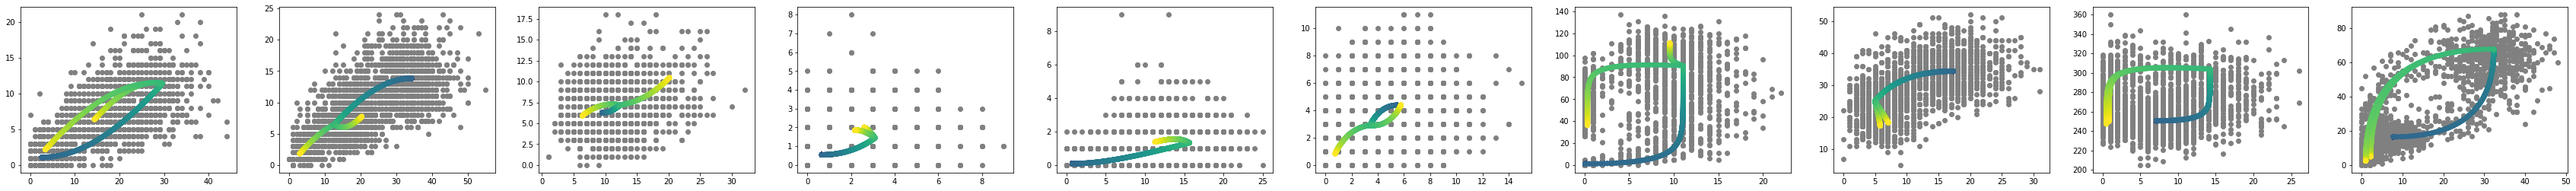

In [5]:
t = np.linspace(tau[0],tau[-1],n)
p = 10
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(p):
    #ax[i].plot(Y[:,i,1]*gamma[i],Y[:,i,1],'--', color='gray');
    ax[i].scatter(X[:,i,0],X[:,i,1],c='gray');
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c=true_t);
# time increases from blue to red

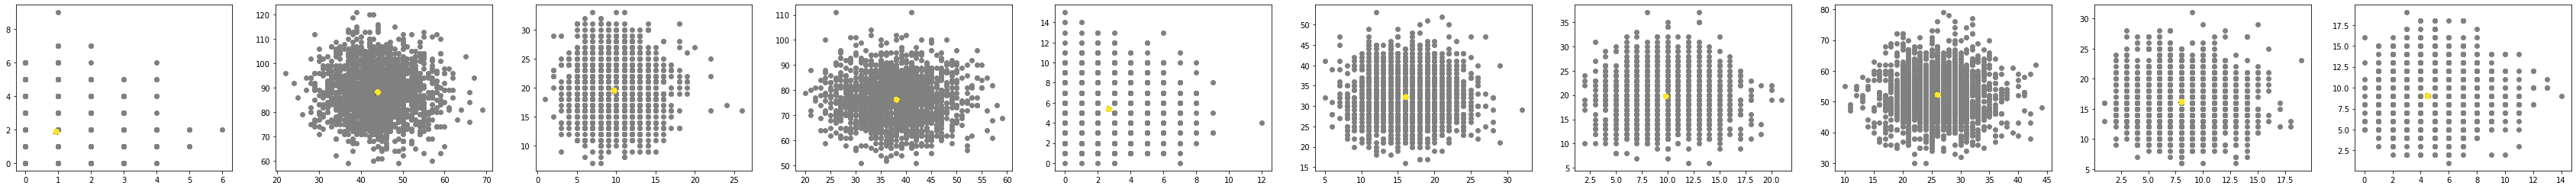

In [6]:
t = np.linspace(tau[0],tau[-1],n)
p = 10
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(-p,0):
    #ax[i].plot(Y[:,i,1]*gamma[i],Y[:,i,1],'--', color='gray');
    ax[i].scatter(X[:,i,0],X[:,i,1],c='gray');
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c=true_t);
# time increases from blue to red

In [7]:
elbos = {}

## Fine cluster

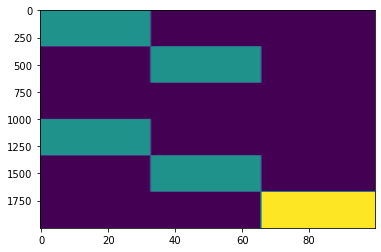

In [8]:
m=100
Q0 = np.zeros((len(X),2,m))

idx = (true_t < 1)
Q0[idx,:,:int(m/3)] += 1

idx = (true_t >= 1) & (true_t < 2)
Q0[idx,:,int(m/3):int(2*m/3)] += 1

idx = (true_t>=2) & (np.arange(2000)<1000)
Q0[idx,0,int(2*m/3):] += 1

idx = (true_t>=2) & (np.arange(2000)>=1000)
Q0[idx,1,int(2*m/3):] += 1

Q0=Q0/Q0.sum(axis=(1,2),keepdims=True)

plt.imshow(Q0[:,1],aspect='auto');

In [21]:
traj = Trajectory(np.array([[0,1,2,3],[0,1,2,4]]),tau = (0,1,2,3), model="two_species_ss", verbose=1)
traj = traj.fit(X,Q=Q0,epoch=100,beta=beta,parallel=True,n_threads=10)
traj.elbos[-1]

run method fit_warm_start


100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


2075.885049491394

<AxesSubplot:>

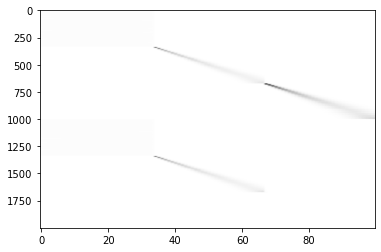

In [22]:
plot_t(traj,l=0)

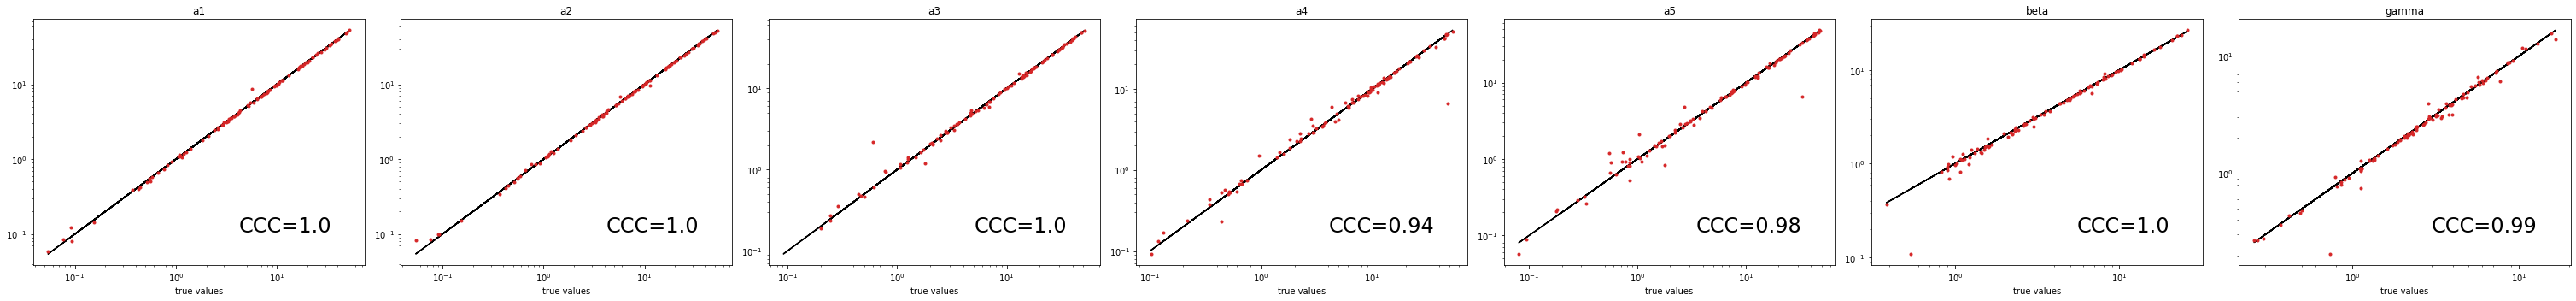

In [23]:
ax = plot_theta(theta[:100,[0,1,2,3,4,-2,-1]], traj.theta[:100], dot_color='tab:red')

In [9]:
traj = Trajectory(np.array([[0,1,2,3],[0,1,2,4]]),tau = (0,1,2,3), model="two_species_ss_tau", verbose=1)
traj = traj.fit(X,Q=Q0,params={"lambda_a":0},beta=10,epoch=100,parallel=True,n_threads=10)
traj.elbos[-1]

run method fit_warm_start


100%|██████████| 100/100 [01:04<00:00,  1.56it/s]


2075.9188538557287

<AxesSubplot:>

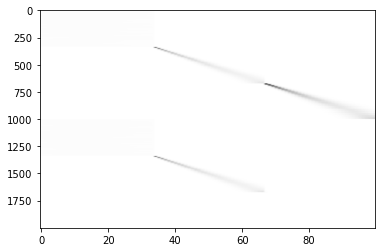

In [10]:
plot_t(traj,l=0)

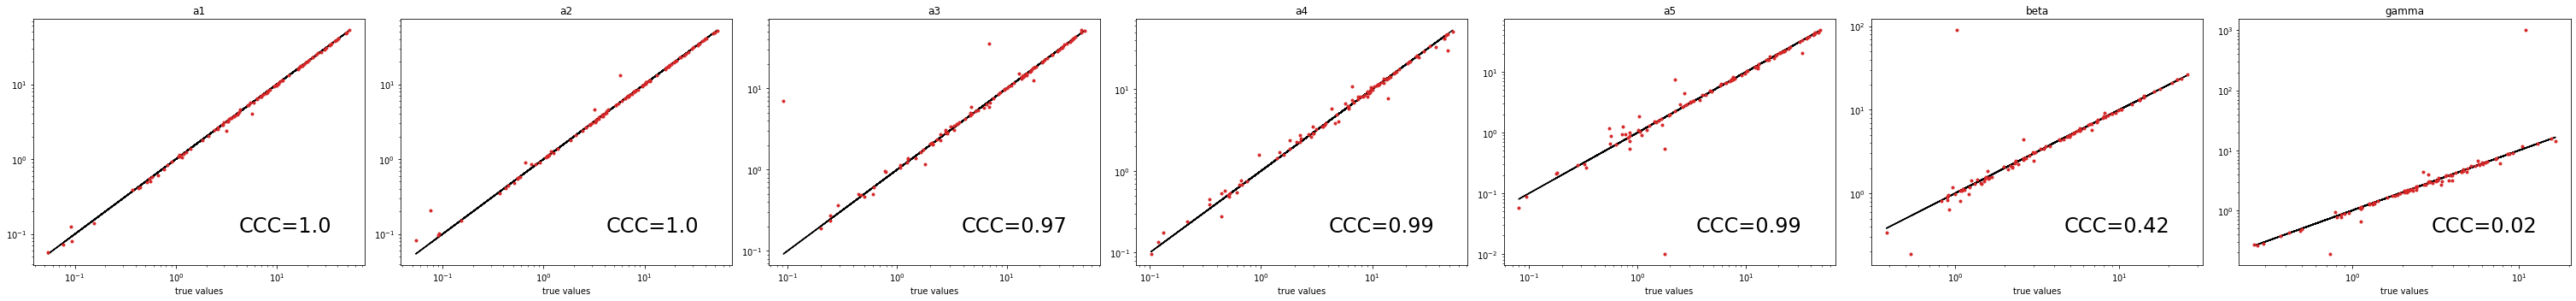

In [11]:
ax = plot_theta(theta[:100,[0,1,2,3,4,-2,-1]], traj.theta[:100,[0,1,2,3,4,-2,-1]], dot_color='tab:red')

(array([ 77.,   4.,   3.,   0.,   2.,   2.,   2.,   2.,   4., 104.]),
 array([0.999 , 0.9992, 0.9994, 0.9996, 0.9998, 1.    , 1.0002, 1.0004,
        1.0006, 1.0008, 1.001 ]),
 <BarContainer object of 10 artists>)

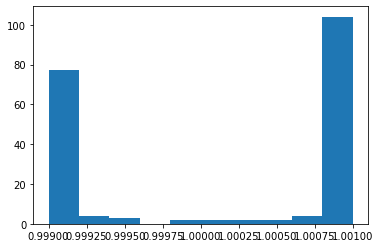

In [12]:
plt.hist(traj.theta[:,-4])

In [79]:
traj = Trajectory(np.array([[0,1,2,3],[0,1,2,4]]),tau = (0,1,2,3), model="two_species_ss_tau", verbose=2)
traj = traj.fit(X,Q=Q0,params={"lambda_tau":lambda_tau},beta=10,epoch=10,parallel=True,n_threads=10)

run method fit_warm_start


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


2027.7308983108871

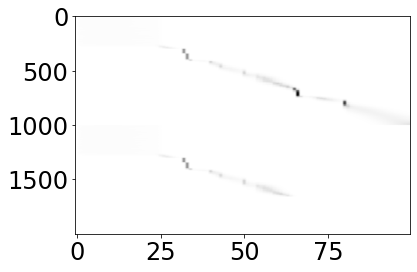

In [80]:
plot_t(traj,l=0)
traj.elbos[-1]

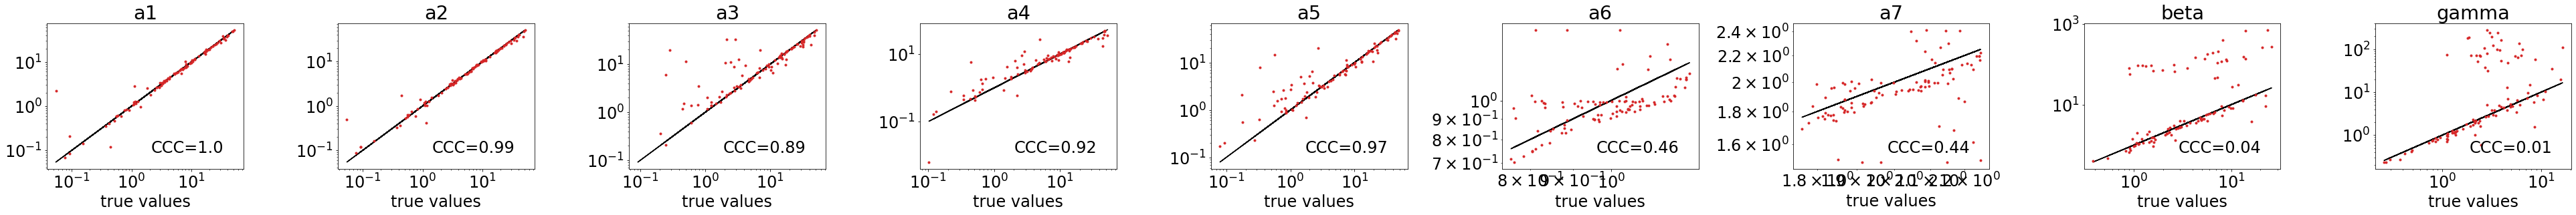

In [81]:
ax = plot_theta(theta[:100,[0,1,2,3,4,5,6,-2,-1]], traj.theta[:100], dot_color='tab:red')

(array([ 5.,  5.,  4., 15., 51.,  7.,  8.,  2.,  0.,  3.]),
 array([0.76088934, 0.8114272 , 0.86196505, 0.9125029 , 0.96304075,
        1.01357861, 1.06411646, 1.11465431, 1.16519217, 1.21573002,
        1.26626787]),
 <BarContainer object of 10 artists>)

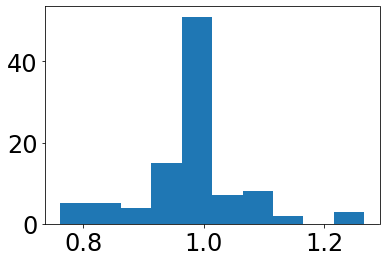

In [44]:
plt.hist(traj.theta[:100,-4])

(array([ 1.,  0., 11., 15., 30., 33.,  6.,  2.,  1.,  1.]),
 array([1.64820492, 1.71732143, 1.78643794, 1.85555444, 1.92467095,
        1.99378746, 2.06290397, 2.13202047, 2.20113698, 2.27025349,
        2.33937   ]),
 <BarContainer object of 10 artists>)

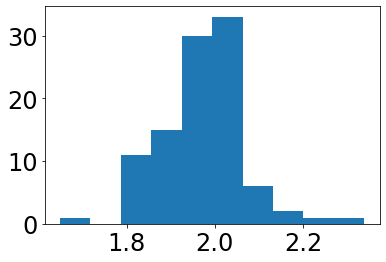

In [45]:
plt.hist(traj.theta[:100,-3])

In [82]:
traj = Trajectory(np.array([[0,1,2,3],[0,1,2,4]]),tau = (0,1,2,3), model="two_species_tau", verbose=1)
traj = traj.fit(X,Q=Q0,params={"lambda_tau":1000},epoch=10,beta=10,parallel=True,n_threads=10)

run method fit_warm_start


100%|██████████| 10/10 [00:27<00:00,  2.71s/it]


<AxesSubplot:>

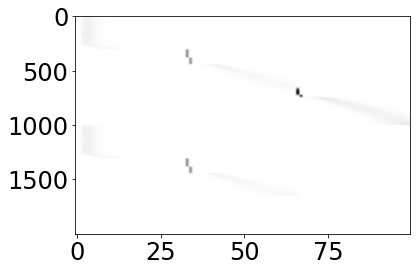

In [83]:
plot_t(traj,l=0)

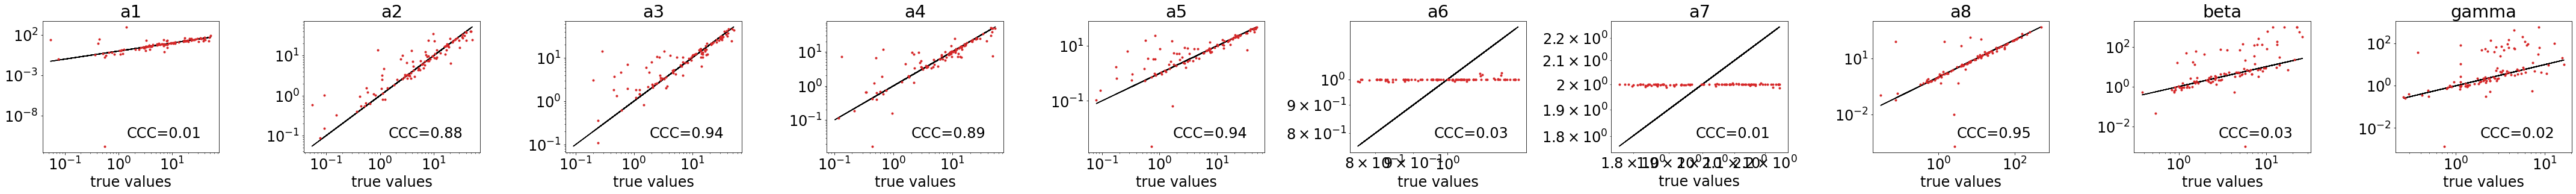

In [84]:
ax = plot_theta(theta[:100], traj.theta[:100], dot_color='tab:red')

(array([  1., 194.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.96488518, 0.98829222, 1.01169926, 1.0351063 , 1.05851334,
        1.08192038, 1.10532742, 1.12873446, 1.1521415 , 1.17554854,
        1.19895559]),
 <BarContainer object of 10 artists>)

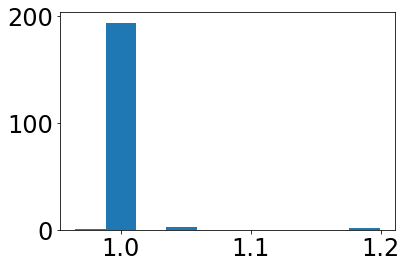

In [100]:
plt.hist(traj.theta[:,-5])

(array([  1.,   0.,   1.,   0.,   0.,   1., 189.,   6.,   1.,   1.]),
 array([1.81223581, 1.83955499, 1.86687418, 1.89419336, 1.92151255,
        1.94883173, 1.97615092, 2.0034701 , 2.03078929, 2.05810847,
        2.08542766]),
 <BarContainer object of 10 artists>)

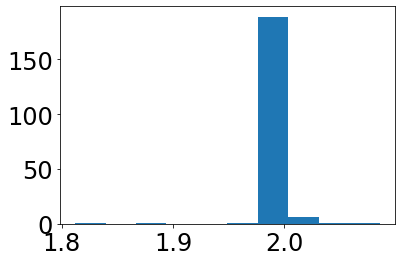

In [101]:
plt.hist(traj.theta[:,-4])

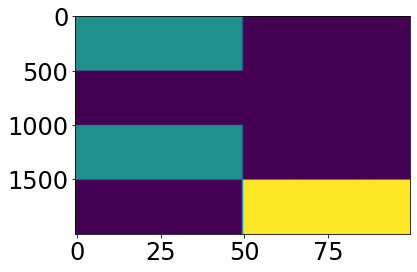

In [88]:
m=100
Q0 = np.zeros((len(X),2,m))

idx = (true_t < 1.5)
Q0[idx,:,:int(m/2)] += 1

idx = (true_t>=1.5) & (np.arange(2000)<1000)
Q0[idx,0,int(m/2):] += 1

idx = (true_t>=1.5) & (np.arange(2000)>=1000)
Q0[idx,1,m//2:] += 1

Q0=Q0/Q0.sum(axis=(1,2),keepdims=True)

plt.imshow(Q0[:,1],aspect='auto');

In [89]:
traj = Trajectory(topo, tau, model="two_species_ss", verbose=2)
traj = traj.fit(X,Q=Q0,beta=beta,epoch=10,parallel=True,n_threads=10)
traj.elbos[-1]

run method fit_warm_start


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


2075.740091893855

<AxesSubplot:>

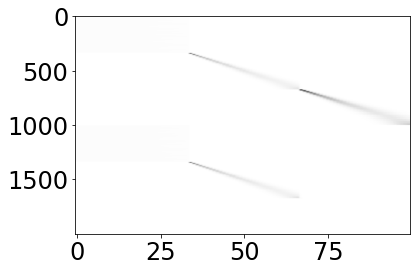

In [90]:
plot_t(traj,l=0)

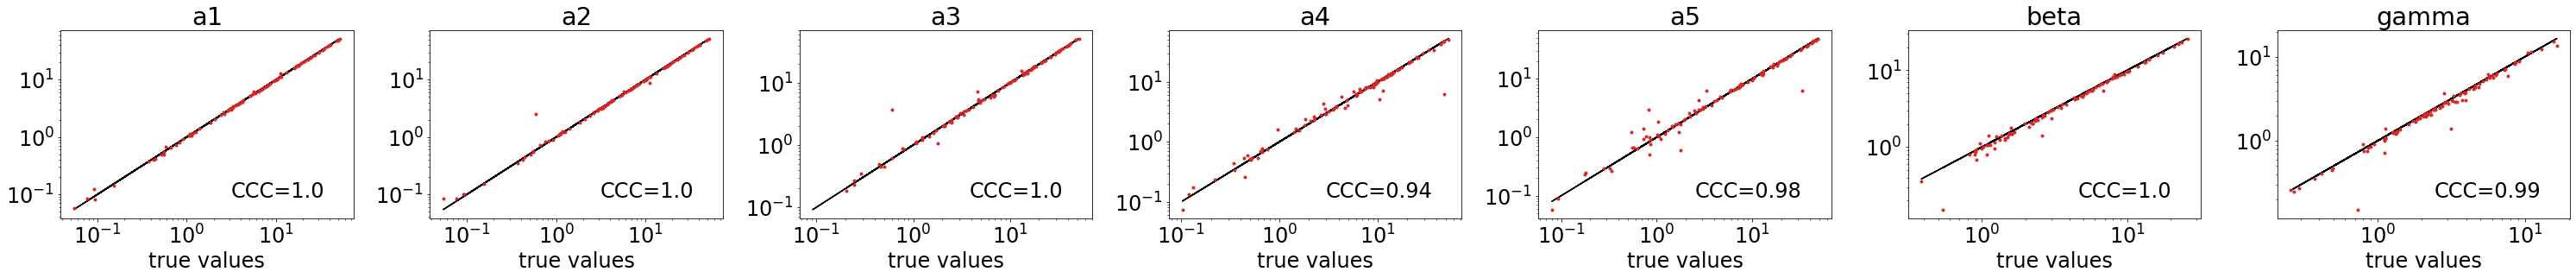

In [91]:
ax = plot_theta(theta[:100], traj.theta[:100,[0,1,2,3,4,-2,-1]], dot_color='tab:red')

In [92]:
traj = Trajectory(topo, tau, model="two_species_tau", verbose=2)
traj = traj.fit(X,m=100,n_init=20,perm_theta=False,beta=beta,epoch=10,parallel=True,n_threads=10)

run method fit_multi_init
trial 1


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]

trial 2



100%|██████████| 10/10 [00:21<00:00,  2.15s/it]

trial 3



100%|██████████| 10/10 [00:19<00:00,  1.94s/it]

trial 4



100%|██████████| 10/10 [00:20<00:00,  2.10s/it]

trial 5



100%|██████████| 10/10 [00:20<00:00,  2.06s/it]

trial 6



100%|██████████| 10/10 [00:20<00:00,  2.04s/it]

trial 7



100%|██████████| 10/10 [00:22<00:00,  2.27s/it]

trial 8



100%|██████████| 10/10 [00:19<00:00,  1.99s/it]

trial 9



100%|██████████| 10/10 [00:19<00:00,  2.00s/it]

trial 10



100%|██████████| 10/10 [00:17<00:00,  1.76s/it]

trial 11



100%|██████████| 10/10 [00:19<00:00,  1.90s/it]

trial 12



100%|██████████| 10/10 [00:22<00:00,  2.22s/it]

trial 13



100%|██████████| 10/10 [00:22<00:00,  2.26s/it]

trial 14



100%|██████████| 10/10 [00:20<00:00,  2.04s/it]

trial 15



100%|██████████| 10/10 [00:19<00:00,  1.99s/it]

trial 16



100%|██████████| 10/10 [00:23<00:00,  2.38s/it]

trial 17



100%|██████████| 10/10 [00:21<00:00,  2.18s/it]

trial 18



100%|██████████| 10/10 [00:22<00:00,  2.23s/it]

trial 19



100%|██████████| 10/10 [00:23<00:00,  2.40s/it]

trial 20



100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


<AxesSubplot:>

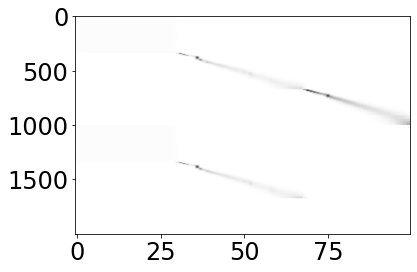

In [93]:
plot_t(traj,l=0)

In [94]:
for i in range(len(traj.elbos)):
    print(traj.elbos[i][-1])

2071.4542604098965
2071.1899046920703
2071.7337735537617
2071.4831671783772
2074.656407700873
2067.883386590665
2067.6212609121235
2074.2050675643454
2073.463557551392
2074.7132816320436
2073.1380344780305
2067.7354903652
2074.606392589698
2073.5339611113213
2066.694836446391
2070.963909175041
2071.1475616737002
2068.8763827712514
2065.2988553032287
2072.754134537716


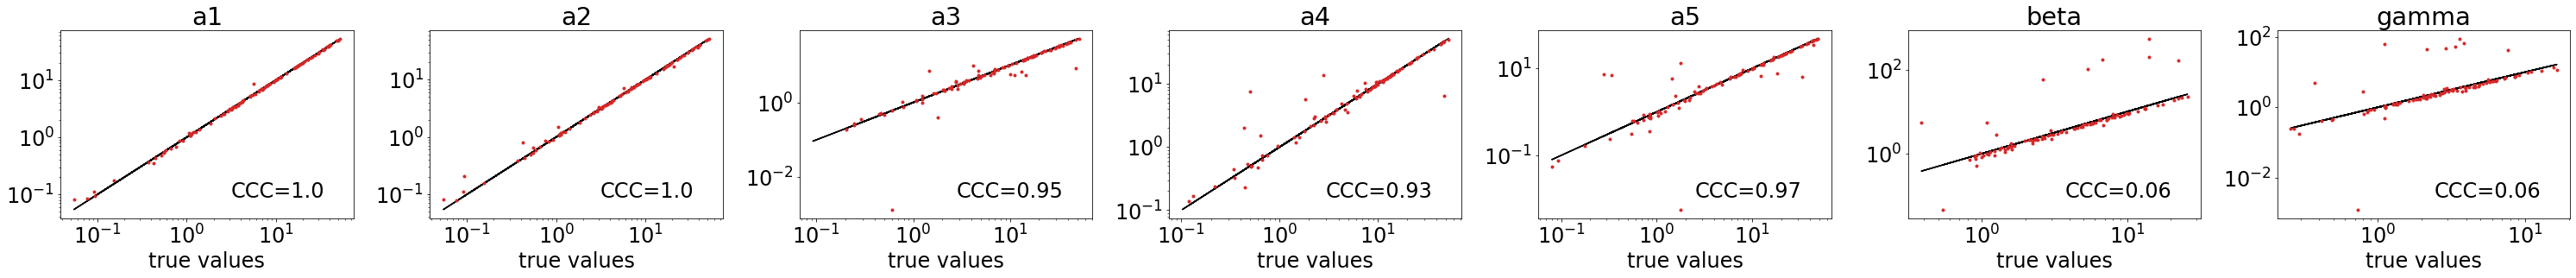

In [95]:
ax = plot_theta(theta[:100], traj.theta[:100,[0,1,2,3,4,-2,-1]], dot_color='tab:red')

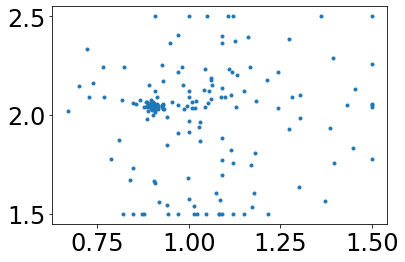

In [96]:
plt.plot(traj.theta[:,-5],traj.theta[:,-4],'.')

## Different seeds

In [ ]:
trajs = []
for seed in tqdm(range(2019,2025)):
    traj = Trajectory(topo, tau, model="two_species_ss", verbose=0)
    traj = traj.fit(X,m=100,n_init=20,perm_theta=False,epoch=100,parallel=True,n_threads=4,seed=seed)
    trajs.append(traj)
    
    elbos['r'+str(seed)] = traj.elbos[np.argmax([traj.elbos[i][-1] for i in range(len(traj.elbos))])] 

In [19]:
with open('simulations.pickle', 'wb') as f:
    pickle.dump(trajs, f, pickle.HIGHEST_PROTOCOL)

In [78]:
with open('simulations.pickle', 'rb') as f:
    trajs = pickle.load(f)

## ELBO plot

In [8]:
np.random.seed(2)
test_Xs=[]
for i in range(3):
    test_Xs.append(np.random.poisson(Y))

for traj in trajs:
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.reshape(len(X),-1))

    
    theta_hat = traj.theta.copy()
    n,L,m = traj.Q.shape
    n,p,_ = X.shape
    Y_pca = np.zeros((L,m,2))
    for l in range(L):
        t_hat = np.linspace(traj.tau[0],traj.tau[-1],m)
        if traj.model == "two_species":
            theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-4:]), axis=1)
        elif traj.model == "two_species_ss":
            theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-3:]), axis=1)
        else:
            print("update plot_phase to include", traj.model)
        Y = traj.get_Y(theta_l_hat,t_hat,tau) # m*p*2
        Y_pca[l] = pca.transform(Y.reshape(len(Y),-1))
    
    
    cmap_y = cmr.get_sub_cmap('Blues_r', 0.2, 0.3)
    fig, ax = plt.subplots(1,1)
    ax.scatter(X_pca[:,0],X_pca[:,1],c='grey');
    ax.scatter(Y_pca[0,67:,0],Y_pca[0,67:,1],c='yellowgreen');
    ax.scatter(Y_pca[1,67:,0],Y_pca[1,67:,1],c='orange');
    ax.scatter(Y_pca[1,:67,0],Y_pca[1,:67,1],cmap=cmap_y, c=np.arange(67));
    ax.scatter(Y_pca[1,0,0],Y_pca[1,0,1],c='k',s=40);
    ax.set_xlabel('PC1',fontsize=24)
    ax.set_ylabel('PC2',fontsize=24)
    ax.set_frame_on(False)
    plt.xticks([]);
    plt.yticks([]);
    """
    idx = np.argmax([ traj.elbos[ii][-1] for ii in range(10)])
    test_elbos = []
    for test_X in test_Xs:
        traj_test = copy.deepcopy(traj)
        Q, elbo = traj_test.update_weight(test_X)
        test_elbos.append(elbo)
    print(traj.elbos[idx][-1],test_elbos)
    
    #traj_theta = traj.theta.copy()
    #if traj.Q[n*2//3:n,0].sum() <= traj.Q[n*2//3:n,1].sum():
    #    traj_theta[:,2] = traj.theta[:,3]
    #    traj_theta[:,3] = traj.theta[:,2]
    #fig = plot_theta_ss(theta[:100], traj_theta[:100], dot_color='tab:red')

19968.704964970602 [19968.278271525785, 19967.575968593374, 19970.4759063894]
19967.017617194822 [19966.470695845306, 19965.77201133413, 19968.72516448854]
19966.910197765883 [19966.380280674195, 19965.667616664126, 19968.541040609285]
19968.138848193856 [19967.581434694523, 19966.894243574166, 19969.801879990242]
19966.89209995088 [19966.43119119254, 19965.724618196316, 19968.58186335708]
19966.812163721293 [19966.160276359533, 19965.512943648584, 19968.39473411113]


In [9]:
complete_L = np.mean((X*np.log(Y)-Y).sum(axis=(-1,-2)))

In [78]:
np.mean((test_X*np.log(Y)-Y).sum(axis=(-1,-2)))

19972.035826382256

In [15]:
traj_true = copy.deepcopy(traj)
traj_true.theta = theta.copy()
traj_true._set_m(100)
Q, elbo = traj_true.update_weight(X)
print(elbo)
true_L = [traj_true.compute_lower_bound(X)]

19968.561889025645


In [16]:
for test_X in test_Xs:
    Q, test_elbo = traj_true.update_weight(test_X)
    print(test_elbo)

19968.7509071508
19968.04519436077
19970.910040765004


In [11]:
traj_true = copy.deepcopy(traj)
traj_true.theta = theta.copy()
traj_true._set_m(1000)
Q, elbo = traj_true.update_weight(X)
print(elbo)

19968.73531405181


In [12]:
traj_true = copy.deepcopy(traj)
traj_true.theta = theta.copy()
traj_true._set_m(10000)
Q, elbo = traj_true.update_weight(X)
print(elbo)

19968.735297864616


In [13]:
traj_true = copy.deepcopy(traj)
traj_true.theta = theta.copy()
traj_true._set_m(100000)
Q, elbo = traj_true.update_weight(X)
print(elbo)

19968.735295986182


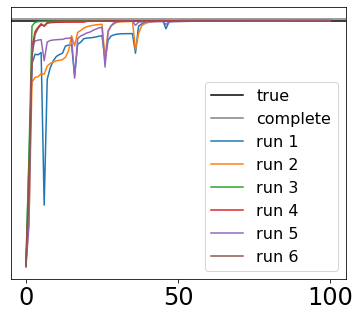

In [76]:
plt.rcParams['font.size'] = '24'

fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.axhline(y=true_L,color='black',label='true')
ax.axhline(y=complete_L,color='grey',label='complete')

for i,traj in enumerate(trajs):
    idx = np.argmax([ traj.elbos[ii][-1] for ii in range(len(traj.elbos))])
    ax.plot(traj.elbos[idx],'-',label='run '+str(i+1))

#ax.set_xlabel('iterations',fontsize=24)
#ax.set_ylabel('relative ELBO',fontsize=24);
ax.set_yscale('log')
ax.axes.get_yaxis().set_visible(False)
plt.legend(fontsize=16);

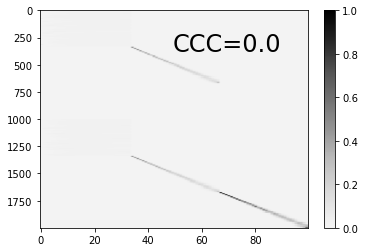

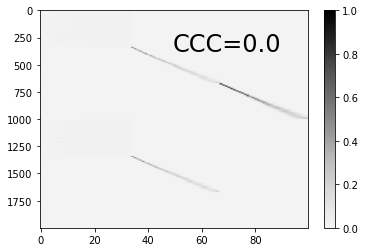

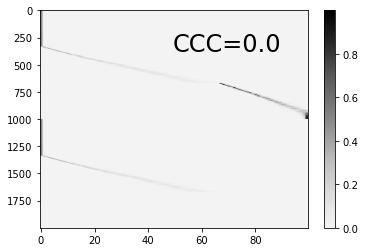

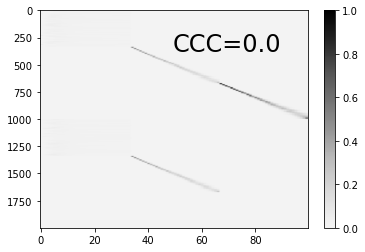

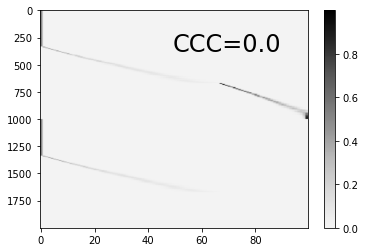

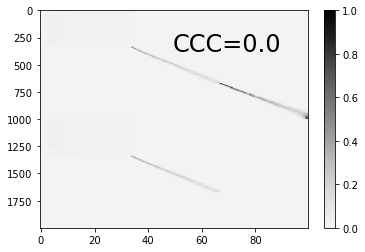

In [27]:
#fig, ax = plt.subplots(1,1)

for traj in trajs:
    plot_t(traj,t=true_t)

## Zoom into one run

In [ ]:
traj = Trajectory(topo, tau, model="two_species_ss_tau", verbose=1)
traj = traj.fit(X,m=100,n_init=10,perm_theta=False,epoch=100,parallel=True,n_threads=10)

run method fit_multi_init
trial 1


 54%|█████▍    | 54/100 [01:22<01:00,  1.32s/it]

### PCA plots

In [80]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.reshape(len(X),-1))

theta_hat = traj.theta.copy()
n,L,m = traj.Q.shape
n,p,_ = X.shape
Y_pca = np.zeros((L,m,2))
for l in range(L):
    t_hat = np.linspace(traj.tau[0],traj.tau[-1],m)
    if traj.model == "two_species":
        theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-4:]), axis=1)
    elif traj.model == "two_species_ss":
        theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-3:]), axis=1)
    else:
        print("update plot_phase to include", traj.model)
    Y = traj.get_Y(theta_l_hat,t_hat,tau) # m*p*2
    Y_pca[l] = pca.transform(Y.reshape(len(Y),-1))

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:,:,1])

theta_hat = traj.theta.copy()
n,L,m = traj.Q.shape
n,p,_ = X.shape
Y_pca = np.zeros((L,m,2))
for l in range(L):
    t_hat = np.linspace(traj.tau[0],traj.tau[-1],m)
    if traj.model == "two_species":
        theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-4:]), axis=1)
    elif traj.model == "two_species_ss":
        theta_l_hat = np.concatenate((theta_hat[:,traj.topo[l]], theta_hat[:,-3:]), axis=1)
    else:
        print("update plot_phase to include", traj.model)
    Y = traj.get_Y(theta_l_hat,t_hat,tau) # m*p*2
    Y_pca[l] = pca.transform(Y[:,:,1])

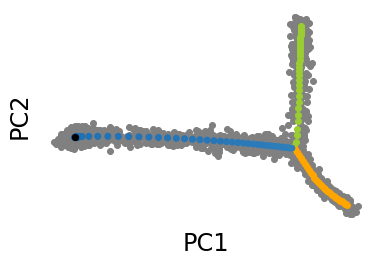

In [82]:
cmap_y = cmr.get_sub_cmap('Blues_r', 0.2, 0.3)
fig, ax = plt.subplots(1,1)
ax.scatter(X_pca[:,0],X_pca[:,1],c='grey');
ax.scatter(Y_pca[0,67:,0],Y_pca[0,67:,1],c='yellowgreen');
ax.scatter(Y_pca[1,67:,0],Y_pca[1,67:,1],c='orange');
ax.scatter(Y_pca[1,:67,0],Y_pca[1,:67,1],cmap=cmap_y, c=np.arange(67));
ax.scatter(Y_pca[1,0,0],Y_pca[1,0,1],c='k',s=40);
ax.set_xlabel('PC1',fontsize=24)
ax.set_ylabel('PC2',fontsize=24)
ax.set_frame_on(False)
plt.xticks([]);
plt.yticks([]);

### Plot Q

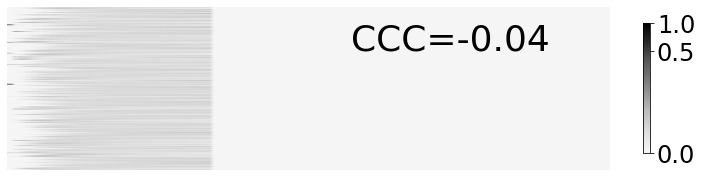

In [136]:
import matplotlib.colors as colors
def _forward(x):
    return np.log(0.05+x)


def _inverse(x):
    return np.exp(x)-0.05

norm = colors.FuncNorm((_forward, _inverse), vmin=0, vmax=1)

plt.rcParams['font.size'] = '24'

fig, ax = plt.subplots(1,1,figsize=(12,3))

cmap_Q = cmr.get_sub_cmap('Greys', 0.08, 1)
cell_idx = (true_t<1)
Z = traj.Q[cell_idx,0,:] + traj.Q[cell_idx,1,:]
im = ax.imshow(Z,aspect="auto",cmap=cmap_Q, norm=norm);

t_hat=traj.Q[:,0,:]@traj.t+traj.Q[:,1,:]@traj.t
ax.text(0.9, 0.9, "CCC="+str(np.around(CCC(t_hat[cell_idx],true_t[cell_idx]),2)), horizontalalignment='right', 
                 verticalalignment='top', transform=ax.transAxes, color="black",fontsize=36);
cbar = plt.colorbar(im,fraction=0.05, shrink =0.8) # adding the colobar on the right
ax.axis('off');

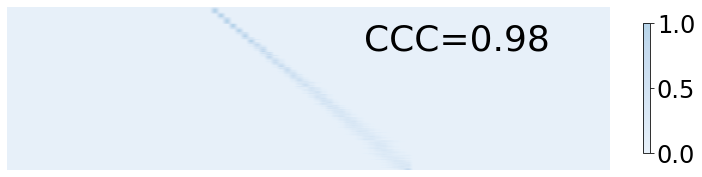

In [135]:
fig, ax = plt.subplots(1,1,figsize=(12,3))

cmap_Q = cmr.get_sub_cmap('Blues', 0.08, 0.3)
cell_idx = (true_t>=1) & (true_t<2)
Z = traj.Q[cell_idx,0,:][np.argsort(true_t[cell_idx])] + traj.Q[cell_idx,1,:][np.argsort(true_t[cell_idx])]
im = ax.imshow(Z,aspect="auto",cmap=cmap_Q);

t_hat=traj.Q[:,0,:]@traj.t+traj.Q[:,1,:]@traj.t
ax.text(0.9, 0.9, "CCC="+str(np.around(CCC(t_hat[cell_idx],true_t[cell_idx]),2)), horizontalalignment='right', 
                 verticalalignment='top', transform=ax.transAxes, color="black",fontsize=36);
plt.colorbar(im,fraction=0.05, shrink =0.8) # adding the colobar on the right
ax.axis('off');

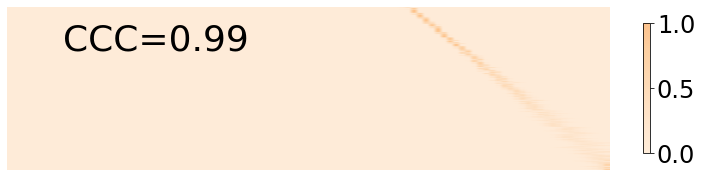

In [132]:
fig, ax = plt.subplots(1,1,figsize=(12,3))

cmap_Q = cmr.get_sub_cmap('Oranges', 0.08, 0.3)
cell_idx = (true_t>=2) & (np.arange(2000)<=1000)
Z = traj.Q[cell_idx,1,:][np.argsort(true_t[cell_idx])]
im = ax.imshow(Z,aspect="auto",cmap=cmap_Q);

t_hat=traj.Q[:,0,:]@traj.t+traj.Q[:,1,:]@traj.t
ax.text(0.4, 0.9, "CCC="+str(np.around(CCC(t_hat[cell_idx],true_t[cell_idx]),2)), horizontalalignment='right', 
                 verticalalignment='top', transform=ax.transAxes, color="black",fontsize=36);

plt.colorbar(im,fraction=0.05, shrink =0.8) # adding the colobar on the right
ax.axis('off');

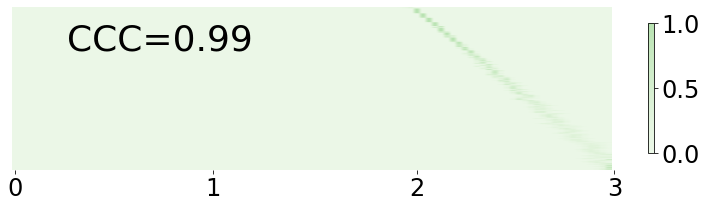

In [133]:
fig, ax = plt.subplots(1,1,figsize=(12,3))

cmap_Q = cmr.get_sub_cmap('Greens', 0.08, 0.3)
cell_idx = (true_t>=2) & (np.arange(2000)>=1000)
Z = traj.Q[cell_idx,0,:][np.argsort(true_t[cell_idx])]
im = ax.imshow(Z,aspect="auto",cmap=cmap_Q);

t_hat=traj.Q[:,0,:]@traj.t+traj.Q[:,1,:]@traj.t
ax.text(0.4, 0.9, "CCC="+str(np.around(CCC(t_hat[cell_idx],true_t[cell_idx]),2)), horizontalalignment='right', 
                 verticalalignment='top', transform=ax.transAxes, color="black",fontsize=36);

plt.colorbar(im,fraction=0.05, shrink =0.8) # adding the colobar on the right
x_label_list = ['0', '1', '2', '3']
ax.set_xticks([0,33,67,100])
ax.set_xticklabels(x_label_list)
ax.set_yticks([])
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

### Plot theta

In [203]:
plt.rcParams['font.size'] = '28'
label_font = 36
      
def plot_theta_ss(theta,theta_hat,dot_color='grey'):
    K=np.shape(theta)[1]-3
    fig, ax = plt.subplots(1,K+3,figsize=(6*(K+3),5))

    for i in range(K):
        ax[i+1].plot(theta[:,i],theta[:,i],color='black');
        ax[i+1].plot(theta[:,i],theta_hat[:,i],'.',color=dot_color);
        ax[i+1].text(0.95, 0.2, "CCC="+str(np.around(CCC(theta_hat[:,i],theta[:,i]))), horizontalalignment='right', 
                 verticalalignment='top', transform=ax[i+1].transAxes, color="black",fontsize=label_font);
        #ax[i+1].set_title("α"+str(i+1), fontsize = label_font)
        ax[i+1].set_xscale('log')
        ax[i+1].set_yscale('log')

    ax[0].plot(theta[:,-3],theta[:,-3],color='black');
    ax[0].plot(theta[:,-3],theta_hat[:,-3],'.',color=dot_color);
    ax[0].text(0.95, 0.2, "CCC="+str(np.around(CCC(theta_hat[:,-3],theta[:,-3]))), horizontalalignment='right', 
                 verticalalignment='top', transform=ax[0].transAxes, color="black",fontsize=label_font);
    #ax[0].set_title("u0", fontsize = label_font)
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    
    ax[-2].plot(theta[:,-2],theta[:,-2],color='black');
    ax[-2].plot(theta[:,-2],theta_hat[:,-2],'.',color=dot_color);
    ax[-2].text(0.95, 0.2, "CCC="+str(np.around(CCC(theta_hat[:,-2],theta[:,-2]))), horizontalalignment='right', 
                 verticalalignment='top', transform=ax[-2].transAxes, color="black",fontsize=label_font);
    #ax[-2].set_title("β", fontsize = label_font);
    ax[-2].set_xscale('log')
    ax[-2].set_yscale('log')
    

    ax[-1].plot(theta[:,-1],theta[:,-1],color='black');
    ax[-1].plot(theta[:,-1],theta_hat[:,-1],'.',color=dot_color);
    ax[-1].text(0.95, 0.2, "CCC="+str(np.around(CCC(theta_hat[:,-1],theta[:,-1]))), horizontalalignment='right', 
                 verticalalignment='top', transform=ax[-1].transAxes, color="black",fontsize=label_font);
    #ax[-1].set_title("γ",fontsize = label_font);
    ax[-1].set_xscale('log')
    ax[-1].set_yscale('log')
    
    #fig.supxlabel("true values", fontsize = label_font);
    #fig.supylabel("estimates", fontsize = label_font)
    plt.tight_layout()
    
    return fig

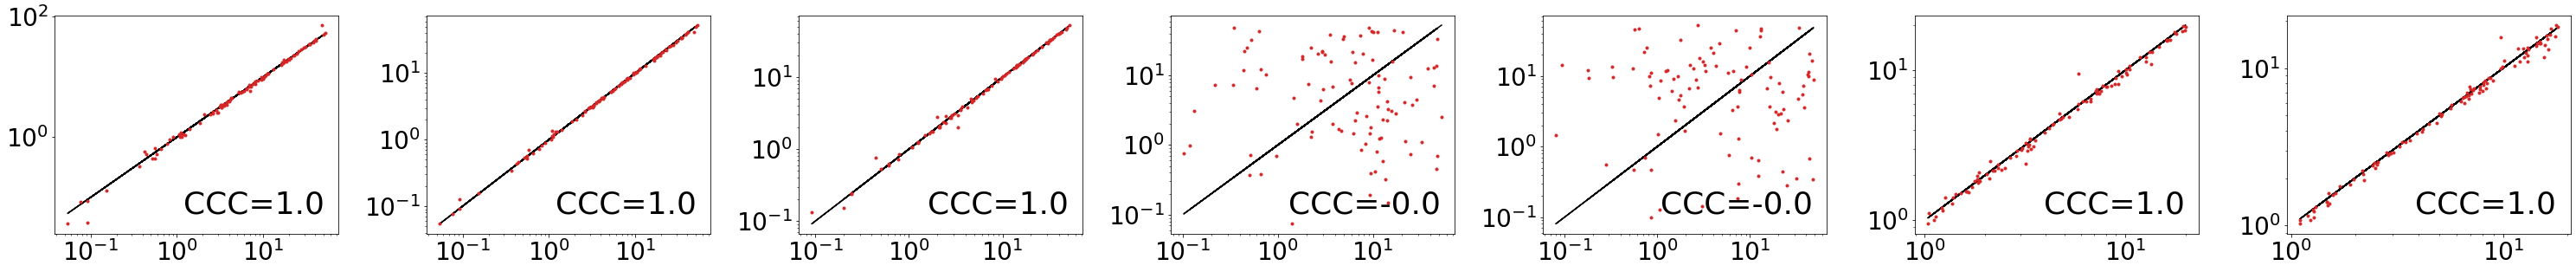

In [204]:
fig = plot_theta_ss(theta[:100], traj.theta[:100,[0,1,3,2,-3,-2,-1]], dot_color='tab:red')

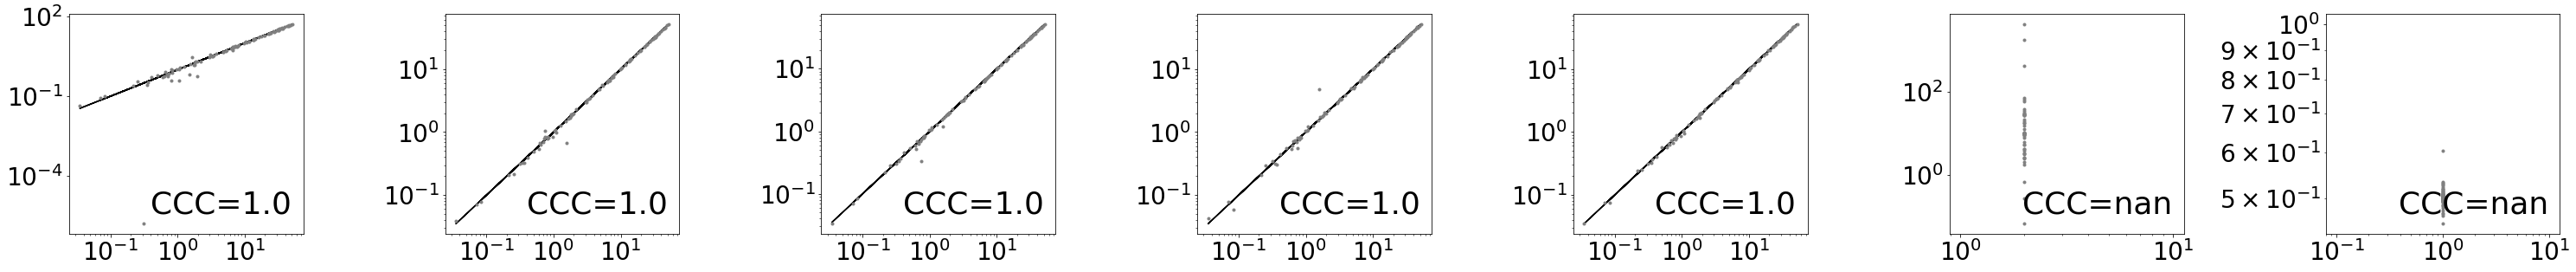

In [205]:
traj.theta[100:,-1] /= traj.theta[100:,-2]
fig = plot_theta_ss(theta[100:], traj.theta[100:,[0,1,3,2,-3,-2,-1]])

[Text(0, 0, 'u0'),
 Text(1, 0, 'α1'),
 Text(2, 0, 'α2'),
 Text(3, 0, 'α3'),
 Text(4, 0, 'α4')]

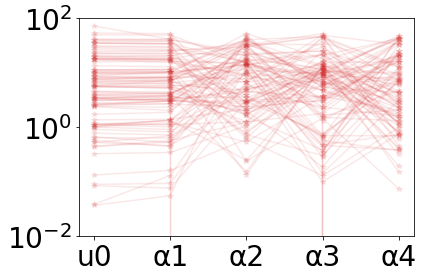

In [206]:
fig,ax = plt.subplots(1,1)
#for j in range(100):
#    ax.plot(traj.theta[j+100,[4,0,1,2,3]],'-*',color='gray',alpha=0.1)
    
for j in range(100):
    ax.plot(traj.theta[j,[4,0,1,2,3]],'-*',color='tab:red',alpha=0.1)


x_label_list = ['u0', 'α1', 'α2', 'α3', 'α4']
plt.yscale('log')
plt.ylim((1e-2,1e2))
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(x_label_list)

[Text(0, 0, 'u0'),
 Text(1, 0, 'α1'),
 Text(2, 0, 'α2'),
 Text(3, 0, 'α3'),
 Text(4, 0, 'α4')]

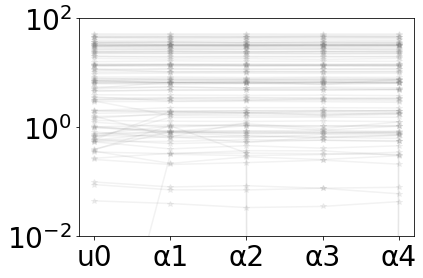

In [207]:
fig,ax = plt.subplots(1,1)
for j in range(100):
    ax.plot(traj.theta[j+100,[4,0,1,2,3]],'-*',color='gray',alpha=0.1)
    
#for j in range(100):
#    ax.plot(traj.theta[j,[4,0,1,2,3]],'-*',color='tab:red',alpha=0.1)


x_label_list = ['u0', 'α1', 'α2', 'α3', 'α4']
plt.yscale('log')
plt.ylim((1e-2,1e2))
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(x_label_list)

### Model selection

In [ ]:
nested_model = {}
for j in range(100):
    nested_model[j]=[[0],[-3]]
accept, diff, _ = traj.compare_model(X, nested_model, epoch=10, parallel=False)

In [ ]:
accept, diff

In [ ]:
_.compute_AIC(X)

In [ ]:
traj.compute_AIC(X)

In [ ]:
accepts = []
diffs = []
for j in range(100):
    nested_model = {j:[[0],[-3]]}
    accept, diff, _ = traj.compare_model(X, nested_model, epoch=10, parallel=False)
    accepts.append(accept)
    diffs.append(diff)
accepts = np.array(accepts,dtype=bool)

In [ ]:
accepts

In [ ]:
_.compute_AIC(X)

In [ ]:
_.compute_lower_bound(X)

In [ ]:
traj.compute_AIC(X)

In [ ]:
traj.compute_lower_bound(X)

In [ ]:
plot_phase(_,idx=np.arange(5))

**pie plot**

In [ ]:
models = ['model 1', 'model 2']
 
data = [np.sum(~accepts),np.sum(accepts)]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = models);

**histogram**

In [ ]:
plt.hist(diffs,density=True)
plt.axvline(x=0,color='red')

# This is not a coincidence

In [ ]:
#%% generate data
loga_max = 4
logb_max = 3
n=1000
p=100
topo = np.array([[0,1,2],[0,1,3]])
tau = (0,1,2,3)
L=len(topo)
n_states=len(set(topo.flatten()))
t=np.linspace(tau[0],tau[-1],n)
    
trajs = []

for random_seed in tqdm(range(10)):
    np.random.seed(random_seed)
    L=len(topo)
    n_states=len(set(topo.flatten()))
    t=np.linspace(tau[0],tau[-1],n)
    true_t = []

    theta=np.zeros((p+100,n_states+3))
    for j in range(n_states):
        theta[:p,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
    theta[:p,-3]=theta[:p,0]
    theta[:p,-2:]=np.exp(np.random.uniform(0,logb_max,size=(p,2)))

    theta[p:,:] = (np.exp(np.random.uniform(0,loga_max,size=100))-1)[:,None]
    theta[p:,-2] = 2
    theta[p:,-1] = 1

    Y = np.zeros((n*L,p+100,2))
    for l in range(L):
        theta_l = np.concatenate((theta[:,topo[l]], theta[:,-3:]), axis=1)
        Y[l*n:(l+1)*n,] = get_Y(theta_l,t,tau) # m*p*2
        true_t = np.append(true_t,t)

    X = np.random.poisson(Y)
    
    traj = Trajectory(topo, tau, model="two_species_ss", verbose=0)
    traj = traj.fit(X,m=100,n_init=10,perm_theta=False,epoch=10,parallel=True,n_threads=4)
    
    traj.true_theta = theta
    traj.true_t = true_t
    
    trajs.append(traj)

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(60,8))
for i in range(2):
    traj = trajs[i]
    plot_t(traj.Q,l=0,ax=ax[0,i],t=true_t)
    plot_t(traj.Q,l=1,ax=ax[1,i],t=true_t)

In [ ]:
traj = trajs[0]
plot_theta(traj.true_theta, traj.theta)

In [ ]:
traj = trajs[0]
true_theta = traj.true_theta.copy()
true_theta[:,2] = true_theta[:,3] 
true_theta[:,3] = traj.true_theta[:,2] 
plot_theta(true_theta, traj.theta)

In [ ]:
traj = trajs[0]
true_theta = traj.true_theta.copy()
true_theta[:,0] = true_theta[:,1] 
true_theta[:,2] = true_theta[:,3] 
true_theta[:,3] = traj.true_theta[:,2] 
plot_theta(true_theta, traj.theta)